Data:
https://www.kaggle.com/uciml/pima-indians-diabetes-database



In [ ]:
# Importing packages.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading the dataset.
# Dataset is from Kaggle
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

diabetes_data = pd.read_csv('diabetes.csv')

In [ ]:
# Checking the first 5 rows of data.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Distribution in Outcome')

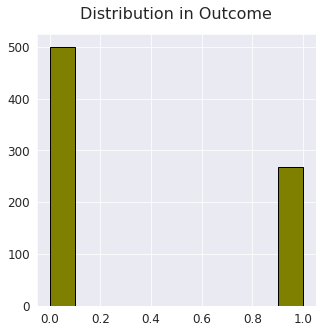

In [ ]:
# Performing exploratory data analysis
# Target variable distribution
sns.set_style('darkgrid')
diabetes_data.Outcome.hist(xlabelsize = 12, xrot = 0, ylabelsize = 12, figsize = (5,5), color ='olive',
                           edgecolor ='black').set_title('Distribution in Outcome', fontdict={'fontsize':16}, pad = 15)

A histogram shows how frequently a value falls into a particular bin. Outcome column is a target. It represented by 0 and 1 values (0: person is non-diabetic, 1: is diabetic). As we can see, majority of people (500) do not have diabetes.

In [ ]:
# Checking data balance.
print('Diabetes rate', diabetes_data.Outcome.mean())

Diabetes rate 0.3489583333333333


The average rate of having diabities is 0.35. 35% of all people in the observations have diabetes. As we see, out data is imbalance, because we have an unequal distribution of classes within a dataset.


In [ ]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


The average rate in every variable (Pregnacies, Glucose level, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age) is higher in people who have diabetes than who did not.

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It is acceptable for Pregnancies and Insulin have a minimum value of zero, because a person might never have been pregnat or took insulin. But Glucose, Blood Pressure, Skin Thickness and BMI have minimum values as zero; it is strange for an alive person. There is possibility that we have missing data, that were marked as a zero, or data were collected wrong.  Also maximum number of Pregnancies and SkinThickness might be to hight. Possibility of outliers is present.

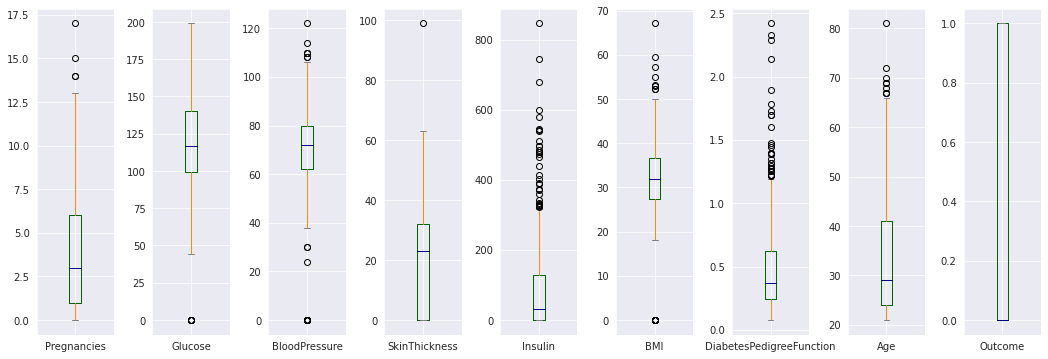

In [ ]:
# Checking for outliers.
import matplotlib.pyplot as plt

tone = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
diabetes_data.plot(kind='box', subplots=True, sharey=False, color=tone, figsize=(18, 6))
plt.subplots_adjust(wspace=0.5)
plt.show()

A box plot is useful to detect outliers but it has several other uses too. It demonstrates locality, spread and skewness groups of numerical data through their quartiles.
Outlier is a data point that is located outside the whiskers of the box plot. As we can see from the chart, the dataset has outliers. Because our dataset is small, we will keep every records, even if it will "hurt" our result.

Text(0.5, 1.0, 'Diabetes Missing Values')

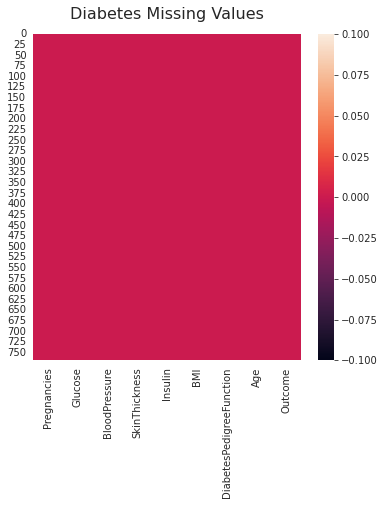

In [ ]:
# Examining missing values using a heatmap.
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(diabetes_data.isnull(), cbar = True)
heatmap.set_title('Diabetes Missing Values', fontdict = {'fontsize':16}, pad = 15)

One of the ways to visualize the missing data is make a heatmap. From this graph we can see that diabetes dataset has no missing values. But we should keep in mind what we discovered early (possibility of missing data marked as zeros).

In [ ]:
# Checking for missing values and examine data types.
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The diabetes_data has 9 numerical columns (float: 2, integer: 7) and 768 rows. No missing values.

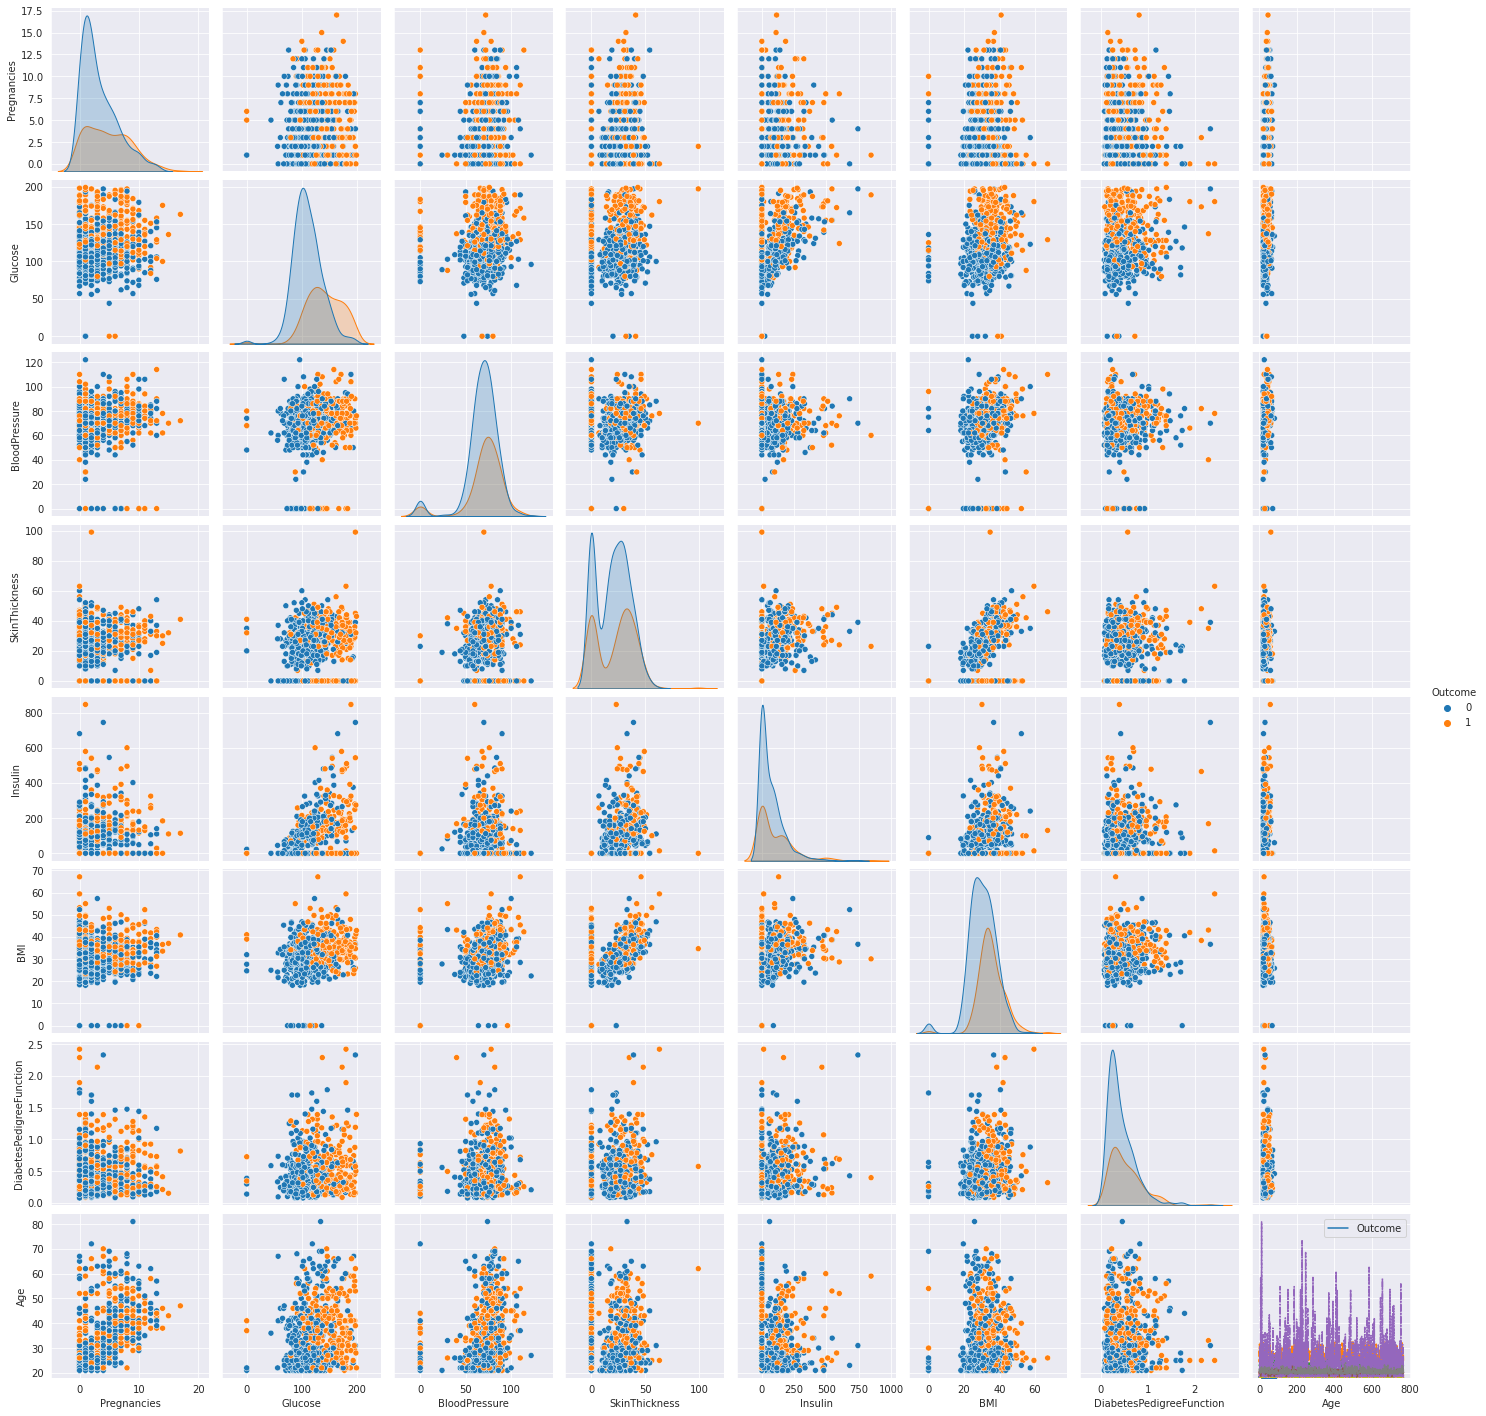

In [ ]:
# Examining data distribution.
import matplotlib.pyplot as plt

sns.pairplot(diabetes_data, hue = 'Outcome')
sns.lineplot(data = diabetes_data)
plt.legend(labels=['Outcome'])

The pairplot() function was used to identify relationships between the variables. The distribution of each variable is shown as a histogram along the diagonal boxes. All other boxes display a scatterplot of the relationship between each pairwise combination of variables.
Hue is used to group to multiple data variable (Outcome: 0 and 1).Outcome column in the dataset is colour encoded: orange color represents people who has diabetes, and blue color represents people without diabetes.
- Women who do not have diabetes have a higher distribution rate of pregnancy.
- Distribution in Glucose level, Blood Pressure, Skin Thickness, Insulin, BMI and Diabetes Pedigree Function are higher for people who do not have diabetes than people who have it.
- Distribution in Pregnancies, Skin Thickness, Insulin, and Diabetes Pedigree Function are right skewed; possibilities of outliers.
- Some features (Pregnancies, Blood Pressure, Insulin, BMI, Diabetes Pedigree Function) have very close means, but different variance values between diabetes and non-diabetes.





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Diabetes Correlation Heatmap')

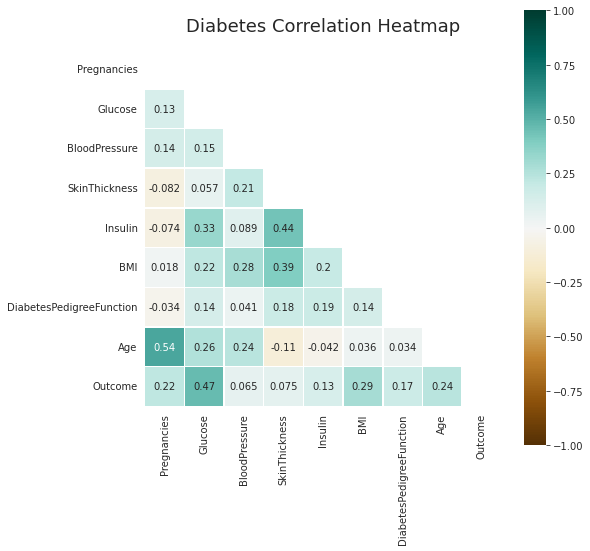

In [ ]:
# Examining data intercorrelations.
import numpy as np
import matplotlib.pyplot as plt

corr = diabetes_data.corr()
plt.figure(figsize = (8, 8))
sns.set_style('white')
mask = np.triu(np.ones_like(corr, dtype = np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', square = True, linewidths = .5)
heatmap.set_title('Diabetes Correlation Heatmap', fontdict = {'fontsize':18}, pad = 18)

The heatmap is a great way to visualize data, because it can show the relation between variabels. In this heatmap we can see the strength of correlation among variables. The darker the color the stronger the correlation.
As we can see from the heatmap, Glucose levels and Outcome have a moderate corelation. Age, BMI and number of Pregnancies all have low positive to correlation with the Outcome variable. Also, the correlation between pairs of features, like Blood Pressure, Skin Thickness, Insulin and Diabetes Pedigree Function have very week to negligible correlation with the Outcome variable.

In [ ]:
# Splitting data 70/30 into training and test datasets.
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Sanity check for the sampled data.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [ ]:
# Building a logistic regression model to predict diabetes.
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
print('Intercept', logmodel.intercept_[0])

Intercept -5.0559372148455966


In [ ]:
logmodel.coef_

array([[ 9.43114142e-02,  2.55406869e-02, -1.98625139e-02,
        -1.53861662e-03, -6.55811075e-05,  5.63283353e-02,
         3.81357054e-01,  8.68398838e-03]])

In [ ]:
print(pd.DataFrame({'Coefficient': logmodel.coef_[0]}, index = X.columns))

                          Coefficient
Pregnancies                  0.094311
Glucose                      0.025541
BloodPressure               -0.019863
SkinThickness               -0.001539
Insulin                     -0.000066
BMI                          0.056328
DiabetesPedigreeFunction     0.381357
Age                          0.008684


The logistic model base on 8 predictors on the training data and has the estimated logistic equation:

Logit(Outcome = have Diabetes (1)) = -5.06 + 0.09 * Pregnancies + 0.03 * Glugose - 0.02 * BloodPressure - 0.002 * SkinThickness - 0.000066 * Insulin + 0.06 * BMI + 0.38 * DiabetesPedigreeFunction + 0.009 * Age

Diabetes Pedigree Function, Pregnancies, BMI and Glucose level have an influence on the model. Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.

In [ ]:
# Evaluating model performance.
print("Test accuracy: {} ".format(logmodel.score(X_test, y_test)))

Test accuracy: 0.7748917748917749 


model.score automates the prediction of our data using X_test and compares it with y_test.
We get a 77.49% accuracy using Logistic Regression in the test set.

In [ ]:
# Display the confusion matrix.
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[132,  14],
       [ 38,  47]])

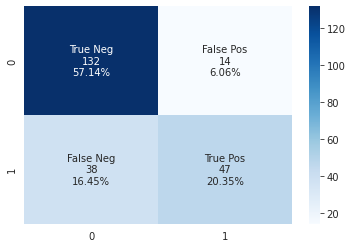

In [ ]:
import numpy as np

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot = labels, fmt = '', cmap = 'Blues')

Confusion matrix helps us to understand the two types of error. Type I, also known as False Positive and type II, also known as a False Negative.

- 132: True Negative, the values which were actually negative and were predicted negative. Which mean, 132 men (57.14%) are non-diabetics were predicted correctly by the model.
- 14: False Positive, the values which were actually negative but falsely predicted as positive. Also known as Type I Error. The model predict that 14 men (6.06%) are diabetics. It was wrong prediction as those men were non-diabetic.
- 38: False Negative, the values which were actually positive but falsely predicted as negative. Also known as Type II Error.  The model predict that 38 men (16.45%) are non-diabetics. It was wrong prediction as those men had diabetes.
- 47: True Positive, the values which were actually positive and were predicted positive. Which means, 47 men (20.35%) were diabetics were predicted correctly by the model.


In [ ]:
# Reporting the following metrics:
# ROC AUC
# Accuracy
# Recall
# Precision
# Display the ROC curve

from sklearn.metrics import confusion_matrix, classification_report
target_names = ['Without Diabetes', 'With Diabetes']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

Without Diabetes       0.78      0.90      0.84       146
   With Diabetes       0.77      0.55      0.64        85

        accuracy                           0.77       231
       macro avg       0.77      0.73      0.74       231
    weighted avg       0.77      0.77      0.76       231



Classification report is one of the model performance evaluation metrics. It displays model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model.
- Precision Score = TP / (FP + TP). Is is a percentage of correct positive predictions relative to total positive predictions.  Out of all people that the model predicted would have diabetes, only 77% actually did.
- Recall Score = TP / (FN + TP). It is a percentage of correct positive predictions relative to total actual positives.  Out of all people that actually did have diabetes, the model only predicted this outcome correctly for 55% of those people.
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall). It is a weighted harmonic mean of precision and recall. The closer to 1, the better the model. In our case the F1 score is 0.64.
- Support: These values simply tell us how many people belonged to each class in the test dataset. We can see that among people in the test dataset, 146 people did not have diabetes and 85 had.
- Accuracy Score = (TP + TN)/ (TP + FN + TN + FP).  It represents the ratio of the sum of true positive and true negatives out of all the predictions. Accuracy is a percentage of correct predictions made by our  model. In our case it is 77%; the higher the accuracy, the better.


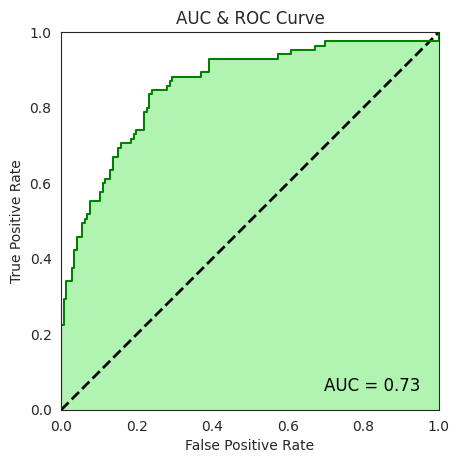

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('AUC & ROC Curve')
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % logit_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

- A ROC curve is a graphical plot used to show the diagnostic ability of binary classifiers. It is plotted with True Positive Rate (TPR) on the y-axis, against the False Positive Rate (FPR) on the x-axis. The TPR represents the proportion of observations that are predicted to be positive when indeed, they are positive. The FPR represents the proportion of observations that are predicted to be positive when they are actually negative. The closer the curve is to the top and left-hand borders, the more accurate the test. Likewise, the closer the graph to the diagonal, the less accurate the test. A perfect test would go straight from zero up to the top-left corner and then straight across the horizontal.
-  Area under the curve (AUC) is a single scalar value that measures the overall performance of a binary classifier. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at distinguishing between people with the diabetes and no diabetes. In our case the AUC is 0.73, it is considered an acceptable measure. It means that the model can classify 73% of the total records correctly but failed to deliver for rest 27% of the records.

In [ ]:
# Determining which features have no effect on the Outcome (Hint: you will need to use statsmodels).
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
logmodel_2 = logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.602566
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.061     
Dependent Variable:    Outcome            AIC:                663.1556  
Date:                  2022-10-19 19:50   BIC:                697.4436  
No. Observations:      537                Log-Likelihood:     -323.58   
Df Model:              7                  LL-Null:            -344.51   
Df Residuals:          529                LLR p-value:        5.5031e-07
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.0959   0.0337  2.8426 0

The summary includes information on the fit process as well as the estimated coefficients. It shows the coefficients, standard error, the associated z-score, and the 95% confidence intervals. We interpret the results as follows:
- The training set consists of 537 observations.
-  Pseudo R-Squared is 0.061. This value can be thought of as the substitute to the R-squared value for a linear regression model. It is calculated as the ratio of the maximized log-likelihood function of the null model to the full model. This value can range from 0 to 1, with higher values indicating a better model fit. In our training set, the pseudo R-squared value is 0.061, which is quite low. This tells us that the predictor variables in the model do not do a very good job of predicting the value of the response variable.
-  LLR p-value is 5.5031e-07. This value can be thought of as the substitute to the p-value for the overall F-value of a linear regression model. If this value is below a certain threshold (e.g. α = 0.05) then we can conclude that the model overall is “useful.” In our training set, LLR p-value < 0.05 (5.5031e-07 or 0.00000055031), which indicates that the overall model is significant. This allows us to look at the rest of the results.
- The values in the Coef column of the output tell us the average change in the log odds of becoming a diabetic:
     - Holding all the other features at fixed values, Pregnancy may increase odds by 0.0959 to have diabetes.
     - Holding all the other features at fixed values, high Glucose level increace odds by 0.0117 became diabetic.
     - Holding all the other features at fixed values, high Blood Pressure has decrease odds by 0.0317 to become diabetic.
- The values in the P>|z| column represent the p-values for each coefficient:
     - Pregnancies, Glugse and Blood Pressure have a p-value less than 0.05, which means there are statistically significant effect on the model.
     - Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age have a p-value greater than 0.05, which means there are do not have any statistically significant effect on the model (have no effect on the Otcome). We should exclude them from the model.


In [ ]:
# Excluding  features with non-statistically significant effects in the model,
# rebuild the model and assess how the reduced feature set affects model performance.

# Droping non-statistically significant variable and  spliting data 70/30 into training and test datasets.
x = diabetes_data.drop(['Outcome', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],  axis=1)
Y = diabetes_data['Outcome']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 1)

In [ ]:
# Cheking variables after dropping non-statistically significant features.
x.head()

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


In [ ]:
# Building a new logistic regression model to predict diabetes.
logmodel_new = LogisticRegression(solver = 'liblinear')
logmodel_new.fit(x_train, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
Y_pred = logmodel_new.predict(x_test)

In [ ]:
print('Intercept', logmodel_new.intercept_[0])

Intercept -3.915689669457037


In [ ]:
print(pd.DataFrame({'Coefficient': logmodel_new.coef_[0]}, index = x.columns))

               Coefficient
Pregnancies       0.096168
Glucose           0.030426
BloodPressure    -0.012702


The new logistic model based on 3 predictors in the new training data and has the estimated a new logistic equation:

Logit(Outcome = have Diabetes (1)) = -3.916 + 0.096 * Pregnancies + 0.03 * Glugose - 0.013 * BloodPressure

Pregnancies and Glucose level have an influence on the new model. Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.

In [ ]:
# Evaluating the new model performance.
print("Test accuracy: {} ".format(logmodel_new.score(x_test, Y_test)))

Test accuracy: 0.7705627705627706 


We get a 77.06% accuracy using Logistic Regression in the new test set (old model had 77.49% accuracy).

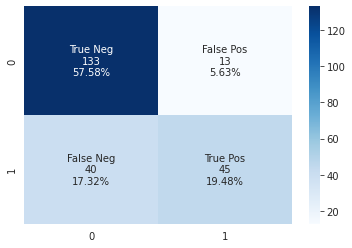

In [ ]:
# Confusion matrix for new model.
conf_matrix_new = confusion_matrix(Y_test, Y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_new.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_new.flatten()/np.sum(conf_matrix_new)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix_new, annot = labels, fmt = '', cmap = 'Blues')

The new model confusion matrix is different from the old model. Those differences are not significant.


In [ ]:
# Report the following metrics (for the new model):
# ROC AUC
# Accuracy
# Recall
# Precision
# Display the ROC curve

from sklearn.metrics import confusion_matrix, classification_report
target_names = ['Without Diabetes', 'With Diabetes']
print(classification_report(Y_test, Y_pred, target_names = target_names))

                  precision    recall  f1-score   support

Without Diabetes       0.77      0.91      0.83       146
   With Diabetes       0.78      0.53      0.63        85

        accuracy                           0.77       231
       macro avg       0.77      0.72      0.73       231
    weighted avg       0.77      0.77      0.76       231



The new model shows slightly difference result from the old model:
- Precision Score is 0.78. Out of all people that the model predicted would have diabetes, only 78% actually did. The old model prediction was 77 %. We have imbalanced class (diabetic, no-diabetec) and high True Positive, Precision is prefered over Recall, because precision has no False Negative in its formula, which can impact. Precision would be the best metric because it determines the correctness of our model.
- Recall Score is 0.53. Out of all people that actually did have diabetes, the model only predicted this outcome correctly for 53% of those people. The old model prediction was 55%.
- F1 Score is 0.63. The old model has it 0.64.
- Support: The same ammount of people in each class for the new and old model.
- Accuracy Scoreis 0.77 which means 77% of correct predictions made by our  model. The old model has the same accuracy.

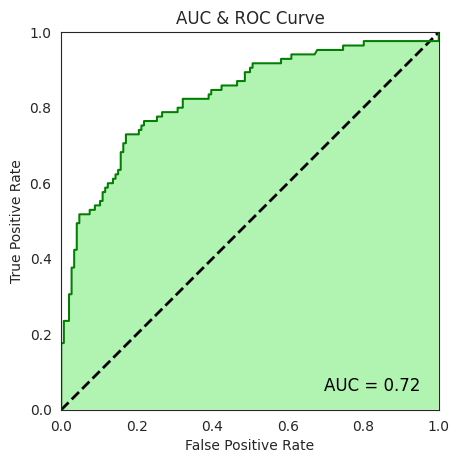

In [ ]:
# AUC and ROC curve.
logit_roc_auc = roc_auc_score(Y_test, logmodel_new.predict(x_test))
fpr, tpr, thresholds = roc_curve(Y_test, logmodel_new.predict_proba(x_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('AUC & ROC Curve')
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % logit_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

- ROC curve for the new model is very symilar to ROC curve in the old model.
- AUC is 0.72, it is considered an acceptable measure. It means that the new model can classify 72% of the total records correctly but failed to deliver for rest 28% of the records. The old model has AUC of 73%. With elumination of some features the new model is less capable (by 1%) of distinguishing between classes, diabetic and no-diabetic, than the old model.
- The new model predict almost the same output regardless of the input. Removing statisticaly non-significant variables did not improve the new model, which means their was no noise in the old model and exluded non-significant features (Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age), or one of them, have very slightly impact on the target (Outccome).

In [ ]:
logit_model_2 = sm.Logit(Y_train, x_train)
logmodel_3 = logit_model_2.fit()
print(logmodel_3.summary2())

Optimization terminated successfully.
         Current function value: 0.605445
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.056     
Dependent Variable: Outcome          AIC:              656.2479  
Date:               2022-10-19 20:14 BIC:              669.1059  
No. Observations:   537              Log-Likelihood:   -325.12   
Df Model:           2                LL-Null:          -344.51   
Df Residuals:       534              LLR p-value:      3.7936e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.0799   0.0288  2.7748 0.0055  0.0235  0.1364
Glucose            0.0123   0.0025  4.9694 0.0000  0.0075  0.0172


The new training set consists of 537 observations.
-  Pseudo R-Squared is 0.056, which is lower than in old model (0.061). Which means that the predictor variables in the new model do not do a very good job of predicting the value of the response variable.
- Pregnancies, Glugse and Blood Pressure have a p-value less than 0.05, which means there are statistically significant effect on the model. P-value of Glucose level slightly improved (new: zero (or very close to it); old is 0.0004).
